<P> <B> <font color=red size="6"> Random Forest Regression </Font></B> </P>

<b>When to Use Random Forest Regression</b>
1. Non-Linear Relationships

    Use Random Forest Regression when there are complex, non-linear relationships between the input features and the target variable.
    It does not require explicit feature transformations or assumptions about the data distribution.

2. High-Dimensional Data

    It works well with datasets that have a large number of features (high-dimensional data), as it automatically selects the most important features during training.

3. Feature Importance

    If you need to interpret the importance of features, Random Forest provides an easy way to compute feature importance scores, helping in understanding which variables contribute most to predictions.

4. Handling Missing Data

    Random Forest can handle datasets with missing values (to some extent) by splitting data using surrogate splits or imputing missing values based on proximity to other data.

5. Avoiding Overfitting

    Random Forest is an ensemble method, averaging the predictions of multiple trees. This reduces the risk of overfitting compared to single decision trees, making it ideal for noisy datasets.

6. Medium-Sized Datasets

    Random Forest is computationally expensive. It performs best with medium-sized datasets (a few thousand to a few hundred thousand samples). For very large datasets, consider alternatives like Gradient Boosting or neural networks.

7. Robustness to Outliers

    Since Random Forest uses decision trees as base models, it is relatively robust to outliers in the dataset.

8. When Interactions Between Variables Are Important

    Random Forest inherently captures interactions between variables, making it suitable for problems where these interactions influence the target variable.

9. Uncertainty About Model Assumptions

    Unlike linear regression, Random Forest does not require you to make assumptions about the relationships between features and the target (e.g., linearity or normality).

<font color="blue" size="6">When Not to Use Random Forest Regression</font>
<ol>
<li>    When Interpretability is Critical:
        Random Forest is not as interpretable as simpler models like linear regression.</li>

<li>    When Computational Resources Are Limited:
        Training and inference can be computationally expensive for very large datasets.</li>

 <li>   For Very High Dimensional Data (Sparse Features):
        If the dataset is extremely sparse (e.g., text data with millions of features), models like Support Vector Machines (SVMs) or specialized neural networks might perform better.</li>

<li>    When You Need Probabilistic Predictions:
        Random Forest does not natively provide confidence intervals or uncertainty estimates. Models like Gaussian Process Regression or Bayesian Regression are better in such cases.
   </li>     </ol>

In [1]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)

In [3]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

<b>Model Parameters:</b>
<ol><li>    n_estimators=100: Builds 100 decision trees.</li>
   <li> max_depth=None: The trees grow until all leaves are pure or contain less than 2 samples.</li>
   <li> random_state=42: Ensures reproducibility.</li></ol>

In [5]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

In [7]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [8]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")

Training Mean Squared Error: 0.0067
Testing Mean Squared Error: 0.0965
Training R^2 Score: 0.9881
Testing R^2 Score: 0.8221


In [9]:
# Feature Importance Visualization
feature_importance = rf_regressor.feature_importances_
features = wine.feature_names

C:\Users\root\AppData\Local\Temp\ipykernel_8984\2265695438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


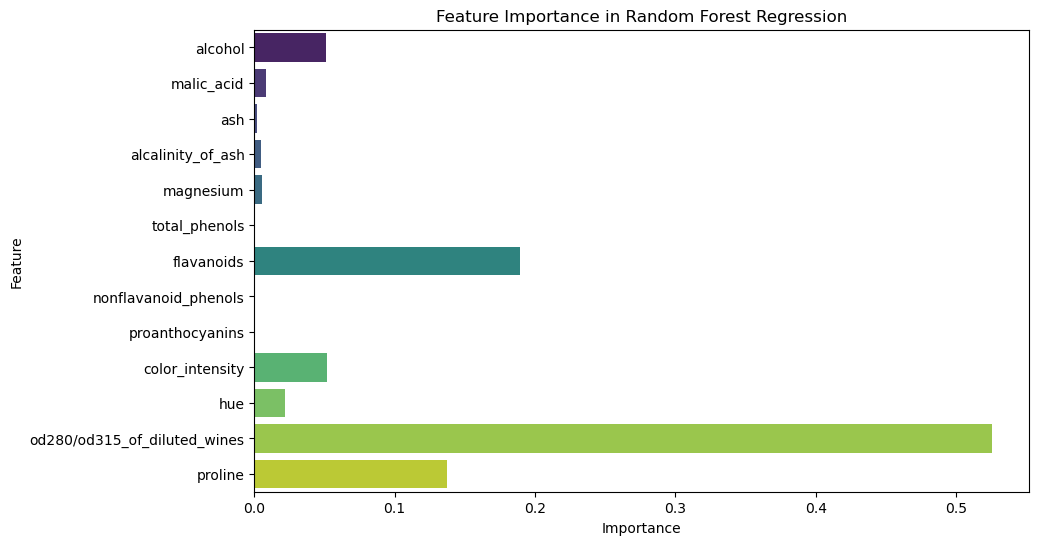

In [10]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()